# Refining the Model 

Right now the model works, but there is a computational issue that prevents it from scaling up to run on real sampled data. With the lower sample rate of the recorded data several pulses can happen between each sample. The in-elegant solution is to upsample the data, but this produces an enormous processign overhead and is not feasible at large scales. So now we need to look into reducing this complexity while still having a useful simulation.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
import bt_ic_model
import pickle

plt.style.use('./new_plot_style.mplstyle')

file_to_read = open("./bandpass_filters_tf.pkl","rb")

bpfs = pickle.load(file_to_read)

file_to_read = open("./fwr_tf_regression.pkl","rb")

FWR_model = pickle.load(file_to_read)

samplerate, data = wavfile.read("./10M_219.WAV")
time = np.linspace(0,len(data)/samplerate,len(data))
data_scaled = data[:,1]*(3.3/4095)

data_scaled = data_scaled - np.mean(data_scaled)

/home/kyle/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: WavFileWarning: Reached EOF prematurely; finished at 509484 bytes, expected 509492 bytes from header.


In [7]:
time = np.linspace(0,len(data)/samplerate,len(data))
dt = 1/samplerate
pulse_trains, time_series = bt_ic_model.SimSignal(voltage_sig=data_scaled,time_step=dt,bpfs=bpfs,FWR_model=FWR_model,rate_ctrl=1)

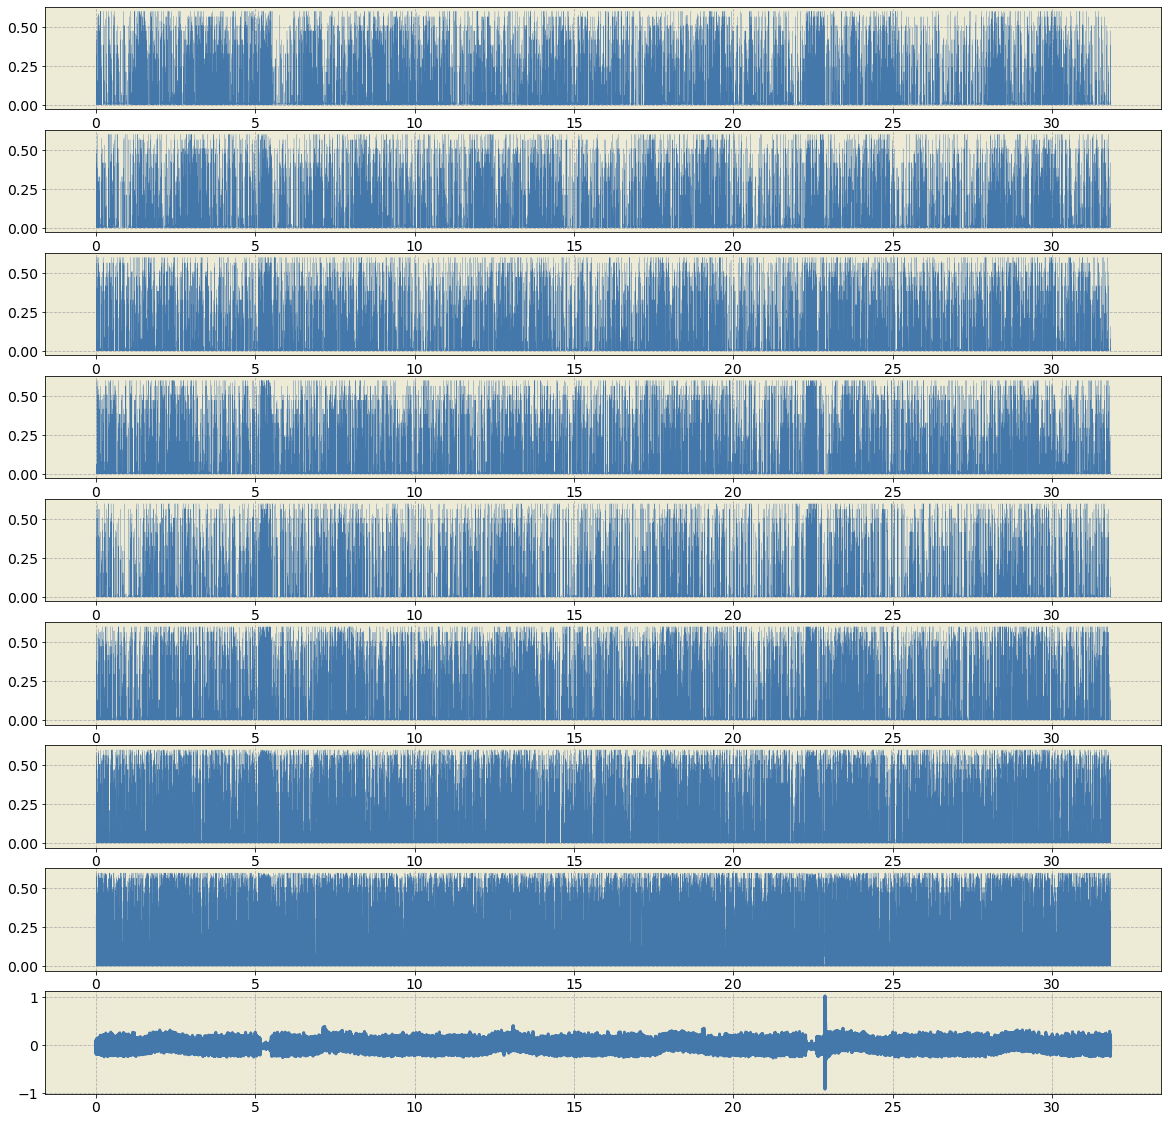

In [9]:
fig, axs = plt.subplots(9,1, figsize=[20,20])

for index, pulses_train in enumerate(pulse_trains):
    axs[index].step(time_series, pulse_trains[index][0], linewidth=0.2)

axs[8].plot(time_series,data_scaled)

Lets look at the first 100 samples and dig in further, this will also allow us to eaisly look at the upscaled data to compare too

In [ ]:
fig, axs = plt.subplots(9,1, figsize=[20,20])

for index, pulses_train in enumerate(pulse_trains):
    axs[index].step(time_series, pulse_trains[index][0], linewidth=0.2)

axs[8].plot(time_series,data_scaled)